<a href="https://colab.research.google.com/github/StephanieKirk/End-to-End-Insurance-Cost-Analysis/blob/main/Captsone_III_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Insurance Cost Capstone III**



by Stephanie Kirk

Link to Dataset and supplemental documentation: https://www.kaggle.com/mirichoi0218/insurance

Objective: Using this dataset I will identify potential factors in determining BMI. To do this I have formed 2 hypotheses to test.



1) Null hypothesis: There is no significant difference in BMI between beneficiaries that are older or younger than 40 years old.

Alternative hypothesis: There is a significant difference in BMI between beneficiaries that are older or younger than 40 years old.



2) Null hypothesis: There is no significant difference in BMI between the northern and southern regions of the beneficiary’s residences.

Alternative hypothesis: There is a significant difference in BMI between northern and southern regions.

In [ ]:
from sqlalchemy import create_engine
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
import warnings

# **Dataset**

---



In [ ]:
warnings.filterwarnings("ignore")
insurance_df = pd.read_csv('https://raw.githubusercontent.com/StephanieKirk/Converstion-Cap/main/insurance_cost.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Dataset Features**


***Column Definitions***

Age: Age of primary beneficiary.

BMI: Body mass index, weight relative to height (kg/m^2)

Region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

Sex: Insurance contractor gender, female, male

Children: Number of children covered by health insurance / Number of dependents

Charges: Individual medical costs billed by health insurance

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.shape

(1338, 7)

This dataset has 7 columns and 1338 rows of customer factors and health information with no Null values. These columns contain string, floats, and integers.

# **Data Frame Manipulation**

---


In this section I will create buckets for my variables. These buckets will allow me to test my hypotheses.

***1) Region***

In this cell I will be converting Region into two categories North and South where North = 0 and South = 1. This column will be named south. 

In [ ]:
df_region_one = pd.get_dummies(insurance_df["region"])

df_region_two = pd.concat((df_region_one, insurance_df), axis=1)

df_region_two['north'] = df_region_two['northeast']+df_region_two['northwest']
df_region_two['south'] = df_region_two['southeast']+df_region_two['southwest']
df_region_two = df_region_two.drop(["northeast"], axis=1)
df_region_two = df_region_two.drop(["northwest"], axis=1)
df_region_two = df_region_two.drop(["southeast"], axis=1)
df_region_two = df_region_two.drop(["southwest"], axis=1)
df_region_two = df_region_two.drop(["north"], axis=1)
south_column = df_region_two['south']
insurance_df = pd.concat([insurance_df,south_column], axis = 1)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,south
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


I will also add in a column with North and South categories. 

In [ ]:
result=[]
for value in insurance_df['south']:
    if value == 0:
      result.append('North')
    else:
      result.append('South')
insurance_df['Regions'] = result 
print(insurance_df)

      age     sex     bmi  children  ...     region      charges  south  Regions
0      19  female  27.900         0  ...  southwest  16884.92400      1    South
1      18    male  33.770         1  ...  southeast   1725.55230      1    South
2      28    male  33.000         3  ...  southeast   4449.46200      1    South
3      33    male  22.705         0  ...  northwest  21984.47061      0    North
4      32    male  28.880         0  ...  northwest   3866.85520      0    North
...   ...     ...     ...       ...  ...        ...          ...    ...      ...
1333   50    male  30.970         3  ...  northwest  10600.54830      0    North
1334   18  female  31.920         0  ...  northeast   2205.98080      0    North
1335   18  female  36.850         0  ...  southeast   1629.83350      1    South
1336   21  female  25.800         0  ...  southwest   2007.94500      1    South
1337   61  female  29.070         0  ...  northwest  29141.36030      0    North

[1338 rows x 9 columns]


***2) Age***

In this cell I will divide Age into two categories, where Older than 40 = 1 and less than 40 = 0. This new column will be called middle_aged.

In [ ]:
insurance_df = insurance_df.assign(middle_aged = insurance_df['age']>39)
insurance_df['middle_aged'] = insurance_df['middle_aged'].astype(int)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,south,Regions,middle_aged
0,19,female,27.900,0,yes,southwest,16884.92400,1,South,0
1,18,male,33.770,1,no,southeast,1725.55230,1,South,0
2,28,male,33.000,3,no,southeast,4449.46200,1,South,0
3,33,male,22.705,0,no,northwest,21984.47061,0,North,0
4,32,male,28.880,0,no,northwest,3866.85520,0,North,0


In [ ]:
result=[]
for value in insurance_df['middle_aged']:
    if value == 0:
      result.append('40 and Older')
    else:
      result.append('Under 40')
insurance_df['Middle'] = result 
print(insurance_df)

      age     sex     bmi  children  ... south Regions  middle_aged        Middle
0      19  female  27.900         0  ...     1   South            0  40 and Older
1      18    male  33.770         1  ...     1   South            0  40 and Older
2      28    male  33.000         3  ...     1   South            0  40 and Older
3      33    male  22.705         0  ...     0   North            0  40 and Older
4      32    male  28.880         0  ...     0   North            0  40 and Older
...   ...     ...     ...       ...  ...   ...     ...          ...           ...
1333   50    male  30.970         3  ...     0   North            1      Under 40
1334   18  female  31.920         0  ...     0   North            0  40 and Older
1335   18  female  36.850         0  ...     1   South            0  40 and Older
1336   21  female  25.800         0  ...     1   South            0  40 and Older
1337   61  female  29.070         0  ...     0   North            1      Under 40

[1338 rows x 11

# **Final Data Frame**

---



In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,south,Regions,middle_aged,Middle
0,19,female,27.900,0,yes,southwest,16884.92400,1,South,0,40 and Older
1,18,male,33.770,1,no,southeast,1725.55230,1,South,0,40 and Older
2,28,male,33.000,3,no,southeast,4449.46200,1,South,0,40 and Older
3,33,male,22.705,0,no,northwest,21984.47061,0,North,0,40 and Older
4,32,male,28.880,0,no,northwest,3866.85520,0,North,0,40 and Older


The new data frame contains 11 columns and 1338 rows. 



In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   south        1338 non-null   uint8  
 8   Regions      1338 non-null   object 
 9   middle_aged  1338 non-null   int64  
 10  Middle       1338 non-null   object 
dtypes: float64(2), int64(3), object(5), uint8(1)
memory usage: 106.0+ KB


The smoker and sex columns have changed from the object/string datatype to unsigned integers. The south (unsigned integer datatype) and middle_aged (integer datatype) columns have also been added. There are still no null values.

The correlation chart shows that there is a low correlation between factors. This is will be taken into account during my analysis of the t-test and confidence interval calculations. 

***Distribution Test***





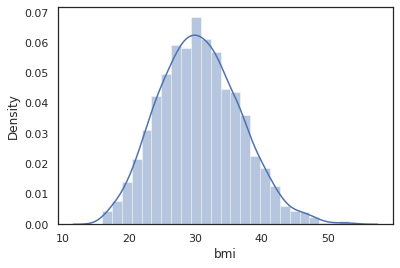

In [ ]:
sns.set_style("white")
ax = sns.distplot(insurance_df['bmi'])

The above histogram shows that the BMI variable is approximately normally distributed and can be used in statistical testing. 

# **Null Hypothesis 1:** 

---

There is no significant difference in BMI between beneficiaries that are older or younger than 40 years old.

***Correlation chart***



In [ ]:
insurance_df[['bmi', 'middle_aged']].corr()

,bmi,middle_aged
bmi,1.000000,0.097257
middle_aged,0.097257,1.000000


Correlation Results: The correlation chart shows a coefficient of 0.0972 which means that there is an extremely small correlation between the middle aged and BMI columns. The coefficient is positive which indicates that there is a positive relationship between the middle aged and BMI columns.





***T-test***





In [ ]:
under_40 = insurance_df.iloc[(insurance_df['middle_aged']== 0).values]
over_39 = insurance_df.iloc[(insurance_df['middle_aged']== 1).values]
stats.ttest_ind(over_39['bmi'], under_40['bmi'])

Ttest_indResult(statistic=3.5718126505285333, pvalue=0.0003671115282211502)

The t-test gives us two numbers, the first is the t-statistic and the second is the p-value. 

*T-statistic*: shows us a negative directionality and a difference of 3.57 standard deviations between the mean BMI of primary beneficiaries that are older or younger than 40. This indicates that the average over 39 BMI is 3.57 standards deviations higher than the average under 40 BMI.

*P-value*: is 0.000367 which is very close to zero. This means we succeed in rejecting the null hypothesis with 95% confidence that there is no difference in BMI between beneficiaries that are older or younger than 40 years old. What this means in that it is unlikely that the difference in the means is due to random chance.


***Confidence Interval Calculation***

In [ ]:
age_1_n = under_40.shape[0]
age_2_n = over_39.shape[0]
age_1_mean = under_40['bmi'].mean()
print("Under 40 mean =", age_1_mean)
age_2_mean = over_39['bmi'].mean()
print("Over 40 mean =", age_2_mean)
age_1_var = under_40['bmi'].var()
age_2_var = over_39['bmi'].var()
std_err_difference = math.sqrt((age_1_var/age_1_n)+(age_2_var/age_2_n))

mean_difference = age_2_mean - age_1_mean
print("Mean difference =", mean_difference)
margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

Under 40 mean = 30.074940652818995
Over 40 mean = 31.2607153614458
Mean difference = 1.1857747086268056
The difference in means at the 95% confidence interval is between 0.5353724476560268 and 1.8361769695975845.


The upper and lower confidence intervals allow me to quantify the difference between the BMI in customers younger and older than 40 years old. The difference in means at the 95% confidence interval is between 0.535 and 1.836.

This means that with 95% confidence we can see that the average BMI of beneficiaries that are older than 40 years old is between 0.535 and 1.836 higher than the average BMI's in customers that are younger than 40 years old. This difference we observe is very small, with an average BMI of 31.2607 for beneficiaries younger than 40 and an average BMI of 30.0749 there is no real impact to BMI.

### **Age Visualizations**

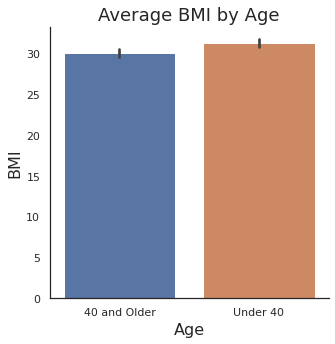

In [ ]:
sns.set_style("white")
plt.figure(figsize = (5,5))
p=sns.barplot(x='Middle', y='bmi', data=insurance_df)
plt.title("Average BMI by Age", fontsize = 18)
p.set_ylabel("BMI", fontsize = 16)
p.set_xlabel("Age", fontsize = 16)
sns.despine()

Text(0.5, 0, 'Middle')

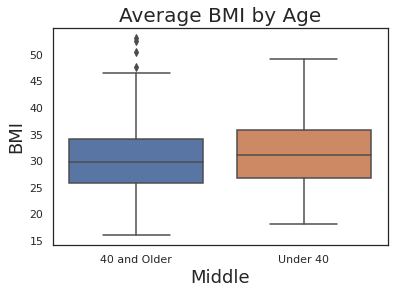

In [ ]:
p= sns.boxplot(y="bmi", x="Middle", data= insurance_df)
plt.title("Average BMI by Age", fontsize = 20)
p.set_ylabel("BMI", fontsize = 18)
p.set_xlabel("Middle", fontsize = 18)

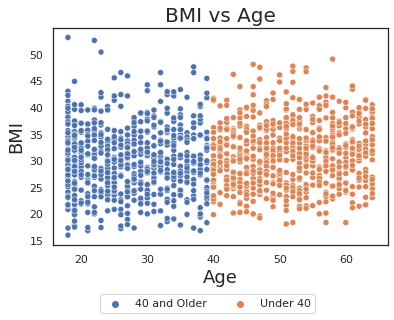

In [ ]:
p=sns.scatterplot(x="age", y= "bmi", hue= "Middle", data=insurance_df)
plt.title("BMI vs Age", fontsize = 20)
p.set_ylabel("BMI", fontsize = 18)
p.set_xlabel("Age", fontsize = 18)
plt.legend(loc="right center", bbox_to_anchor=(0.8, -0.20), ncol= 2)

# **Null Hypothesis 2:** 

---


There is no significant difference in BMI between the northern and southern regions of the beneficiary’s residences. 

***Correlation chart***

In [ ]:
insurance_df[['bmi', 'south']].corr()

,bmi,south
bmi,1.000000,0.235113
south,0.235113,1.000000


In [ ]:
stats.pearsonr(insurance_df['south'], insurance_df['bmi'])

(0.23511279757695452, 2.9199912529441028e-18)

Correlation Results: The correlation chart shows a coefficient of 0.235 which means that there is a small correlation between the south and BMI columns. The coefficient is positive which indicates that there is a positive relationship between the south and BMI columns.


***T-test***

In [ ]:
north_df = insurance_df.iloc[(insurance_df['south']== 0).values]
south_df = insurance_df.iloc[(insurance_df['south']== 1).values]
stats.ttest_ind(north_df['bmi'], south_df['bmi'])

Ttest_indResult(statistic=-8.841531326892444, pvalue=2.9199912529424176e-18)

The t-test gives us two numbers, the first is the t-statistic and the second is the p-value. 

*T-statistic*: shows us a negative directionality and a difference of 8.84 standard deviations between the mean BMI in the south and the mean BMI in the north. This indicates that the average southern BMI is 8.84 standards deviations higher than the average northern BMI. 

*P-value*: is 2.91999e-18 which is very close to zero. This means we succeed in rejecting the null hypothesis with 95% confidence that there is no difference in BMI between the northern and southern regions of the beneficiary’s residences. What this means in that it is unlikely that the difference in the means is due to random chance.

***Confidence Interval Calulation***

In [ ]:
region_1_n = north_df.shape[0]
region_2_n = south_df.shape[0]
region_1_mean = north_df['bmi'].mean()
print("Northern region mean =", region_1_mean)
region_2_mean = south_df['bmi'].mean()
print("Southern region mean =", region_2_mean)
region_1_var = north_df['bmi'].var()
region_2_var = south_df['bmi'].var()
std_err_difference = math.sqrt((region_1_var/region_1_n)+(region_2_var/region_2_n))
print("standard error of difference =", std_err_difference)
mean_difference = region_2_mean - region_1_mean
print("Mean difference =", mean_difference)
margin_of_error = 1.96 * std_err_difference
print("confidence interval = 0.6342409723059248", )
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error
print("lower limit = 2.233492606874719")
print("upper limit = 3.5019745514866569")
print("c.i lower =", ci_lower)
print("c.i upper =", ci_upper)

Northern region mean = 29.186664098613257
Southern region mean = 32.0543976777939
standard error of difference = 0.32316882402243324
Mean difference = 2.867733579180644
confidence interval = 0.6342409723059248
lower limit = 2.233492606874719
upper limit = 3.5019745514866569
c.i lower = 2.234322684096675
c.i upper = 3.5011444742646134


The upper and lower confidence intervals allow me to quantify the difference between the BMI in the southern and northern regions. The difference in means at the 95% confidence interval is between 2.234 and 3.501.

This means that with 95% confidence we can see that the average BMI of beneficiaries in the southern regions are between 2.2 and 3.5 higher than the average BMI's in the northern regions. This is not a very large difference, however if you take into account that the average BMI in the north is about 29.18 this difference does become significant in that the difference is large enough to cause a change in the BMI category from healthy (under 30) to obese (30 or higher). This is significant due to the link that has been found between higher BMI and the overall cost of healthcare of individuals that are obese. 

### ***Region Visualization***

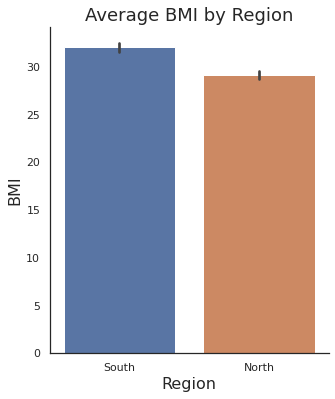

In [ ]:
sns.set_style("white")
plt.figure(figsize = (5,6))
p=sns.barplot(x='Regions', y='bmi', data=insurance_df)
plt.title("Average BMI by Region", fontsize = 18)
p.set_ylabel("BMI", fontsize = 16)
p.set_xlabel("Region", fontsize = 16)
sns.despine()

Text(0.5, 0, 'Regions')

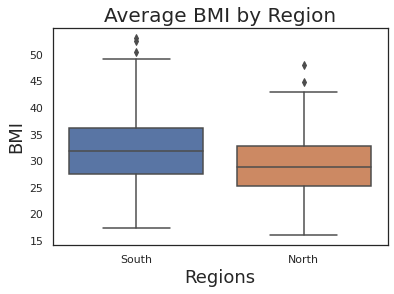

In [ ]:
p = sns.boxplot(y="bmi", x="Regions", data= insurance_df)
plt.title("Average BMI by Region", fontsize = 20)
p.set_ylabel("BMI", fontsize = 18)
p.set_xlabel("Regions", fontsize = 18)

Text(0.5, 0, 'Region')

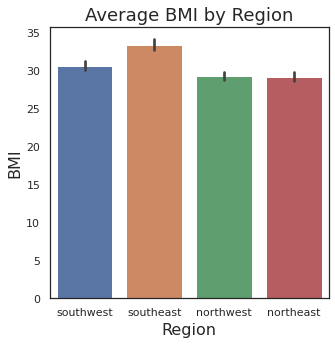

In [ ]:
sns.set_style("white")
plt.figure(figsize = (5,5))
p=sns.barplot(x='region', y='bmi', data=insurance_df)
plt.title("Average BMI by Region", fontsize = 18)
p.set_ylabel("BMI", fontsize = 16)
p.set_xlabel("Region", fontsize = 16)

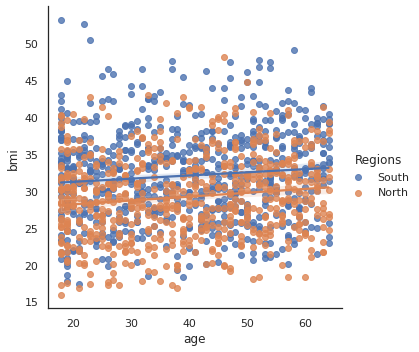

In [ ]:
sns.lmplot(x="age", y="bmi", hue= "Regions", data=insurance_df)

# Recommendations

---



The objective of this project was to identify potential factors in determining a beneficiaries BMI in order to provide recommendations on how those risk factors can be used to drive business objectives. 





**Age Hypothesis Recommendation**


The results of my t-test had a very small p-value of 0.000367 so was I able to reject my null hypothesis that there is no significant difference in BMI between beneficiaries that are older or younger than 40 years old, however based on my findings it is clear that being older or younger than 40 years old is not a factor that should be used to determine BMI. 

My statistical testing showed 
an extremely low correlation, a very small difference in means of only 1.185 and means of 31.2607 for beneficiaries over 40 years old and 30.0749 for beneficiaries under 40 years old. The two means being above the CDC's defined BMI in determining obesity of 30.0 and a confidence interval of between 0.535 and 1.836 allowed me to quantify the actual effect age has on BMI. This information indicates that although we can be 95% confident in the amount of difference between the two means, the actual difference is so small that it has no real world-significance.  

***Region Hypothesis Recommendation***

Based on my findings I would recommend that Region be used as a risk factor for determining BMI. With a low p-value of 2.9199912529424176e-18 we can reject the null hypothesis that there is no significant difference in BMI between the northern and southern regions of the beneficiary’s residences. More importantly we observe that the mean BMI in the south is 32.054 and 29.187 in the north. This difference in means puts the south above the obesity level of 30.0 as defined by the CDC. This results in the southern region being in an entirely different BMI health risk category than the northern regions. The confidence interval calculation supports this with 95% confidence we can see that the average BMI of beneficiaries in the southern regions are between 2.2 and 3.5 higher than the average BMI's in the northern regions. Meaning we are 95% confident that the difference we observe between average BMI's in the north in the south with put result in the average BMI in the south being well over the obesity amount of 30.0.

This can be used by employers with workers located nationally to target their employee health programs more affectively by understanding that employees located in the south should have health plans targeted differently than those in the north. For example, they could target nutritional and physical exercise plans to southern employees more than northern employees due to the higher BMI observed in the south. This will allow them to improve employee health and decrease their health care expenditures.